<a href="https://colab.research.google.com/github/martinpius/Applied-Predictive-Modeling2/blob/master/ML_the_basics_binary_classification%2C_multi_class_classification_and_regression_problem_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
try:
  COLAB = True
  import tensorflow as tf
  print(f"You are using Google Colab with tensorflow version: {tf.__version__}")
except Exception as e:
  COLAB = False
  print(f"{type(e)}: {e}\n....Please Load Your Drive....")

def time_fmt(t):
  h = int(t / (60 * 60))
  m = int(t % (60 * 60) / 60)
  s = int(t % 60)
  return f"{h}: {m:>03}: {s:>05.2f}"
print(f"Testing the time formater: {time_fmt(123.16730)}")

Mounted at /content/drive
You are using Google Colab with tensorflow version: 2.4.1
Testing the time formater: 0: 002: 03.00


In [ ]:
#We will do some intro to classification and regression modeling using NNT
#Specifically we will apply real datasets for a simple binary prediction problem, multiclass prediction problem and a regression problem.
#For binary classification the assessment procedure mostly used is ROC cuurves 

In [ ]:
from scipy import stats
import time, math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_rows', 8)
pd.set_option('display.max_columns', 0)

In [ ]:
chd = pd.read_csv("https://data.heatonresearch.com/data/t81-558/wcbreast_wdbc.csv", na_values = ['NA','?'])

In [ ]:
display(chd)

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
pd.isna(chd).value_counts()

id     diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  mean_symmetry  mean_fractal_dimension  se_radius  se_texture  se_perimeter  se_area  se_smoothness  se_compactness  se_concavity  se_concave_points  se_symmetry  se_fractal_dimension  worst_radius  worst_texture  worst_perimeter  worst_area  worst_smoothness  worst_compactness  worst_concavity  worst_concave_points  worst_symmetry  worst_fractal_dimension
False  False      False        False         False           False      False            False             False           False                False          False                   False      False       False         False    False          False           False         False              False        False                 False         False          False            False       False             False              False            False                 False           False               

In [ ]:
chd.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
#We are going to predict wheather a person has the breast cancer or not (binary classification problem):
chd.groupby('diagnosis')['mean_radius'].aggregate(['count','mean','var','std'])

,count,mean,var,std
diagnosis,,,,
B,357,12.146524,3.170222,1.780512
M,212,17.462830,10.265431,3.203971


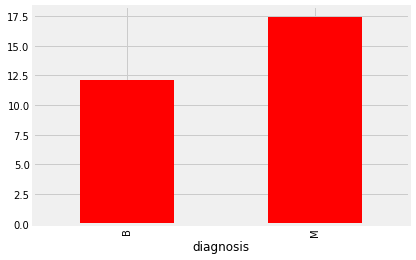

In [ ]:
chd.groupby('diagnosis')['mean_radius'].mean().plot(kind = 'bar', color = 'red')

In [ ]:
mu1, mu2,variance = 2,-2,1
sigma = math.sqrt(variance)
x1, x2 = np.linspace(mu1 - 5* sigma, mu1 + 4 *sigma, 100), np.linspace(mu2 - 5 * sigma, mu2 + 4 * sigma, 100)


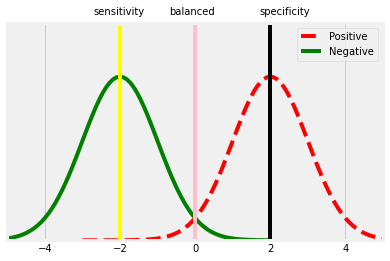

In [ ]:
plt.plot(x1, stats.norm.pdf(x1, mu1, sigma)/1, color = 'red', linestyle = 'dashed')
plt.plot(x2, stats.norm.pdf(x2, mu2, sigma)/1, color = 'green')
plt.axvline(x = 2, color = 'black')
plt.axvline(x = 0, color = 'pink')
plt.axvline(x = -2, color = 'yellow')
plt.text(-2.7, 0.55, 'sensitivity')
plt.text(-0.7, 0.55, 'balanced')
plt.text(1.7, 0.55, 'specificity')
plt.ylim([0,0.53])
plt.xlim([-5,5])
plt.legend(['Positive', 'Negative'])
plt.yticks([])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
#Ploting the confusion matrix 
def plot_confusion_matrix(cm, names, title='Confusion matrix', 
                            cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=45)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
# The function to plot the ROC curve
def plot_roc(y_preds, y_real):
    fp, tp, _ = roc_curve(y_real, y_preds)
    roc_auc = auc(fp, tp)

    plt.figure()
    plt.plot(fp, tp, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
#Prepare the data and train a binary classification network

In [ ]:
display(chd.drop('id', axis = 1))

,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,0.3857,1.4280,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [ ]:
#Decode the target into 0,1 using the map functio
target = chd['diagnosis'].map({'M': 1, 'B': 0})

In [ ]:
target[0:4]

0    1
1    1
2    1
3    1
Name: diagnosis, dtype: int64

In [ ]:
cols = chd.drop(['id','diagnosis'], axis = 1).columns

In [ ]:
cols

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'se_radius', 'se_texture', 'se_perimeter', 'se_area', 'se_smoothness',
       'se_compactness', 'se_concavity', 'se_concave_points', 'se_symmetry',
       'se_fractal_dimension', 'worst_radius', 'worst_texture',
       'worst_perimeter', 'worst_area', 'worst_smoothness',
       'worst_compactness', 'worst_concavity', 'worst_concave_points',
       'worst_symmetry', 'worst_fractal_dimension'],
      dtype='object')

In [ ]:
#Scale into (-3,3) all continous variables:
for col in cols:
  chd[col] = stats.zscore(chd[col])

In [ ]:
display(chd)

,id,diagnosis,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,842302,M,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,842517,M,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,84300903,M,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,84348301,M,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,926682,M,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611,1.300499,2.260938,1.156857,1.291565,-0.424010,-0.069758,0.252202,0.808431,-0.189161,-0.490556,1.536720,2.047399,1.421940,1.494959,-0.691230,-0.394820,0.236573,0.733827,-0.531855,-0.973978
566,926954,M,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587,0.184892,-0.257371,0.276693,0.180698,-0.379342,0.661277,0.510827,0.612157,-0.891416,0.036727,0.561361,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409
567,927241,M,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695,1.157935,0.686088,1.438530,1.009503,-0.173000,2.017716,1.302285,0.785721,0.326634,0.904057,1.961239,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635
568,92751,B,-1.808401,1.221792,-1.814389,-1.347789,-3.112085,-1.150752,-1.114873,-1.261820,-0.820070,-0.561032,-0.070279,0.383092,-0.157449,-0.466152,0.049342,-1.163516,-1.057501,-1.913447,0.752830,-0.382754,-1.410893,0.764190,-1.432735,-1.075813,-1.859019,-1.207552,-1.305831,-1.745063,-0.048138,-0.751207


In [ ]:
x = chd[cols]

In [ ]:
x.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,se_radius,se_texture,se_perimeter,se_area,se_smoothness,se_compactness,se_concavity,se_concave_points,se_symmetry,se_fractal_dimension,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757,0.907083,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450,-0.099444,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036,0.293559,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680,2.047511,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092,0.499328,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


In [ ]:
x, target = x.values, target.values #convert into numpy arrays

In [ ]:
x[0:2]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [ ]:
target[0:2]

array([1, 1])

In [ ]:
#split the data into train-validation sets:
x_train, x_test, y_train, y_test = train_test_split(x, target, test_size = 0.2)

In [ ]:
BUFFER = len(x_train)
BATCH_SIZE = 64
#Change into tensorflow datatype
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.shuffle(BUFFER).batch(BATCH_SIZE, drop_remainder = True)
val_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))
val_data = val_data.shuffle(BUFFER).batch(BATCH_SIZE, drop_remainder = True)
x_train_sample_batch, y_train_sample_batch = next(iter(train_data))
print(f"x_train_sample_batch_shape: {x_train_sample_batch.shape}\ny_train_sample_batch_shape: {y_train_sample_batch.shape}")

x_train_sample_batch_shape: (64, 30)
y_train_sample_batch_shape: (64,)


Model: "mlp"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_dim (InputLayer)       [(None, 30)]              0         
_________________________________________________________________
dense1 (Dense)               (None, 128)               3968      
_________________________________________________________________
dense2 (Dense)               (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
outputs (Dense)              (None, 1)                 65        
Total params: 12,289
Trainable params: 12,289
Non-trainable params: 0
_________________________________________________________________


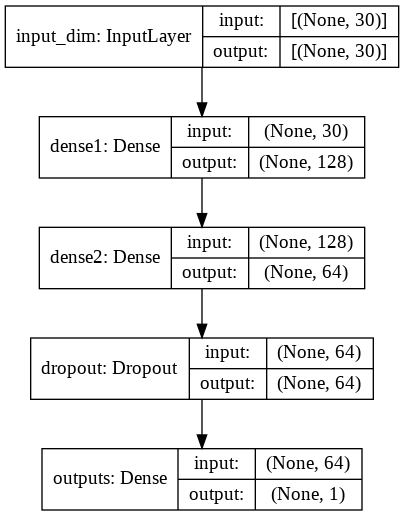

In [ ]:
#Building a simple MLP for binary classification:
inputs = tf.keras.Input(shape = (x.shape[1],), name = 'input_dim')
x = tf.keras.layers.Dense(units = 128, kernel_initializer = 'random_normal', activation ='relu', name = 'dense1')(inputs)
x = tf.keras.layers.Dense(units = 64, kernel_initializer = 'random_normal', activation = 'relu', name = 'dense2')(x)
x = tf.keras.layers.Dropout(rate = 0.5, name = 'dropout')(x)
outputs = tf.keras.layers.Dense(units = 1, activation = 'sigmoid', name = 'outputs')(x)
model = tf.keras.Model(inputs = inputs, outputs = outputs, name = 'mlp')
model.summary()
tf.keras.utils.plot_model(model = model, to_file = 'mlp.png', show_shapes = True)


In [ ]:
model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
info = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',min_delta = 1e-3,patience = 6,mode = 'auto',verbose = 1, restore_best_weights= True)

In [ ]:
model.fit(x_train, y_train,validation_data = (x_test, y_test), verbose = 2, epochs = 100,callbacks = [info], batch_size = 64)

Epoch 1/100
8/8 - 1s - loss: 0.6054 - accuracy: 0.7824 - val_loss: 0.4551 - val_accuracy: 0.9474
Epoch 2/100
8/8 - 0s - loss: 0.3969 - accuracy: 0.9341 - val_loss: 0.2711 - val_accuracy: 0.9649
Epoch 3/100
8/8 - 0s - loss: 0.2477 - accuracy: 0.9473 - val_loss: 0.1663 - val_accuracy: 0.9649
Epoch 4/100
8/8 - 0s - loss: 0.1729 - accuracy: 0.9473 - val_loss: 0.1213 - val_accuracy: 0.9649
Epoch 5/100
8/8 - 0s - loss: 0.1234 - accuracy: 0.9560 - val_loss: 0.1027 - val_accuracy: 0.9649
Epoch 6/100
8/8 - 0s - loss: 0.1007 - accuracy: 0.9670 - val_loss: 0.0942 - val_accuracy: 0.9649
Epoch 7/100
8/8 - 0s - loss: 0.0836 - accuracy: 0.9758 - val_loss: 0.0886 - val_accuracy: 0.9649
Epoch 8/100
8/8 - 0s - loss: 0.0844 - accuracy: 0.9758 - val_loss: 0.0828 - val_accuracy: 0.9649
Epoch 9/100
8/8 - 0s - loss: 0.0735 - accuracy: 0.9824 - val_loss: 0.0786 - val_accuracy: 0.9737
Epoch 10/100
8/8 - 0s - loss: 0.0600 - accuracy: 0.9802 - val_loss: 0.0757 - val_accuracy: 0.9737
Epoch 11/100
8/8 - 0s - loss: